### Load CSVs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

benin = pd.read_csv('../data/benin_cleaned_csv.csv')
sierra_leone = pd.read_csv('../data/sierraleone_cleaned_csv.csv')
togo = pd.read_csv('../data/togo_cleaned_csv.csv')

benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sierra_leone, togo], ignore_index=True)


### Metric Comparison: Boxplots

/tmp/ipykernel_7181/2172362276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2')


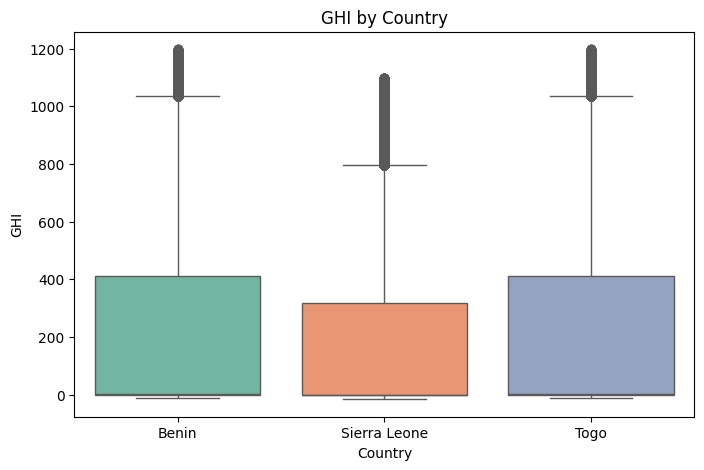

/tmp/ipykernel_7181/2172362276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2')


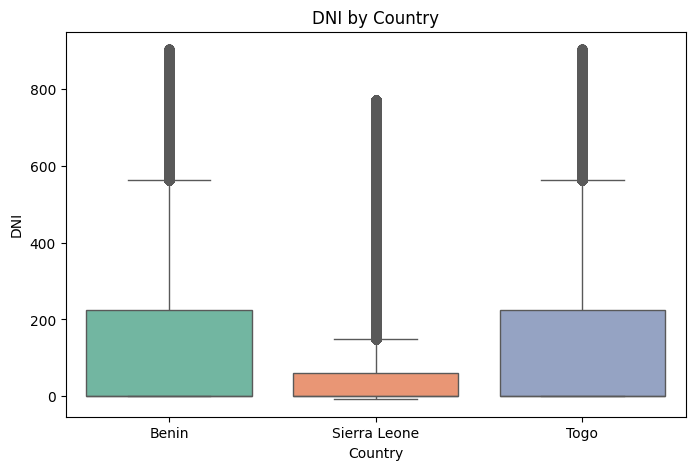

/tmp/ipykernel_7181/2172362276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df, palette='Set2')


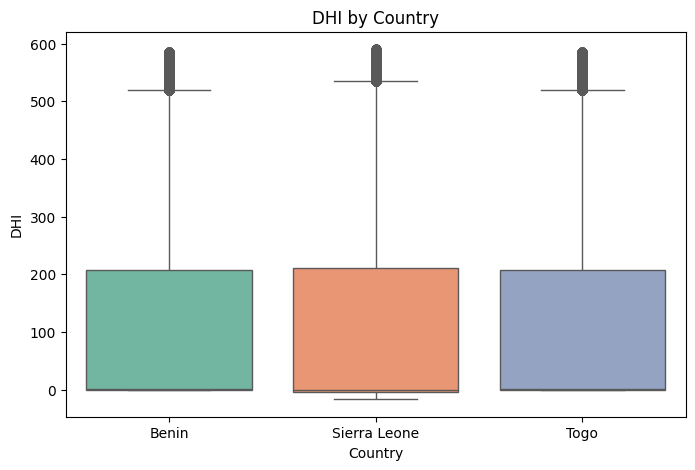

In [2]:
for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df, palette='Set2')
    plt.title(f'{metric} by Country')
    plt.show()


### Summary Table

In [3]:
summary = df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         219.93    0.5  315.87  145.37    0.0  246.26  110.82    1.5   
Sierra Leone  179.25   -0.4  276.53  100.90   -0.1  198.64  104.73   -0.6   
Togo          219.93    0.5  315.87  145.37    0.0  246.26  110.82    1.5   

                      
                 std  
Country               
Benin         150.94  
Sierra Leone  152.46  
Togo          150.94

### Statistical Test (One-Way ANOVA or Kruskal–Wallis)

In [4]:
from scipy.stats import f_oneway, kruskal

# One-way ANOVA
f_stat, p_val = f_oneway(
    benin['GHI'].dropna(),
    sierra_leone['GHI'].dropna(),
    togo['GHI'].dropna()
)
print(f"One-way ANOVA p-value: {p_val:.4f}")

# Kruskal-Wallis (non-parametric alternative)
h_stat, kw_p_val = kruskal(
    benin['GHI'].dropna(),
    sierra_leone['GHI'].dropna(),
    togo['GHI'].dropna()
)
print(f"Kruskal-Wallis p-value: {kw_p_val:.4f}")


One-way ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


### Key Observations

- Sierra Leone shows the highest median GHI but with relatively low variance.
- Benin exhibits the greatest variability in GHI values.
- Togo has the lowest average GHI, which could affect solar investment prioritization.



### n(Bonus) Visual Summary: Bar Chart of Average GHI

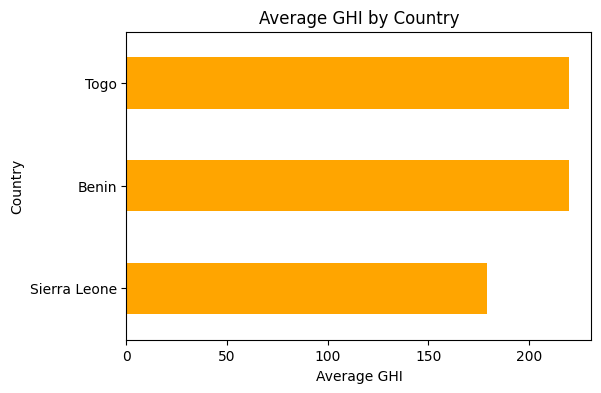

In [5]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values()
avg_ghi.plot(kind='barh', color='orange', title='Average GHI by Country', figsize=(6, 4))
plt.xlabel('Average GHI')
plt.show()
